# Advanced Data Science Capstone

## Churn Prediction with extensive algorithm comparisson

I have decided to attempt to predict churn using data from the TelCom industry.

The feature "Exited" represents the churn (loyalty) factor in this analysis and is therefore the label.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's have look at the data!

In [2]:
df = pd.read_csv('churn_data.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Note: The dataset has relatively few columns – only fourteen. It contains demographical, social economic geographical data on telcom customers. These features include a credit score, gender, age, tenure, location and surname.

It also contains a few indicators of what type of customer this is, such as whether they have a credit card, whether they are active members and the number of telecom products they have at the company.

In the code cell below, I define a function to drop features such as rownumber, customerid and surname, and transformed the data using one-hot encoding for categorical features such as geography and gender.

I also define functions to assess various algorithms using RepeatedStratifiedKFold. The final output will be a graphical overview of each algorithm and its performence (rated per accuracy).

In [4]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Judging by the correlation matrix, it seems as if Age, Balance and IsActiveMember are among the most predictive features. Age and Balance are positively correlated with Exited whereas IsActiveMember is negatively correlated with Exited.

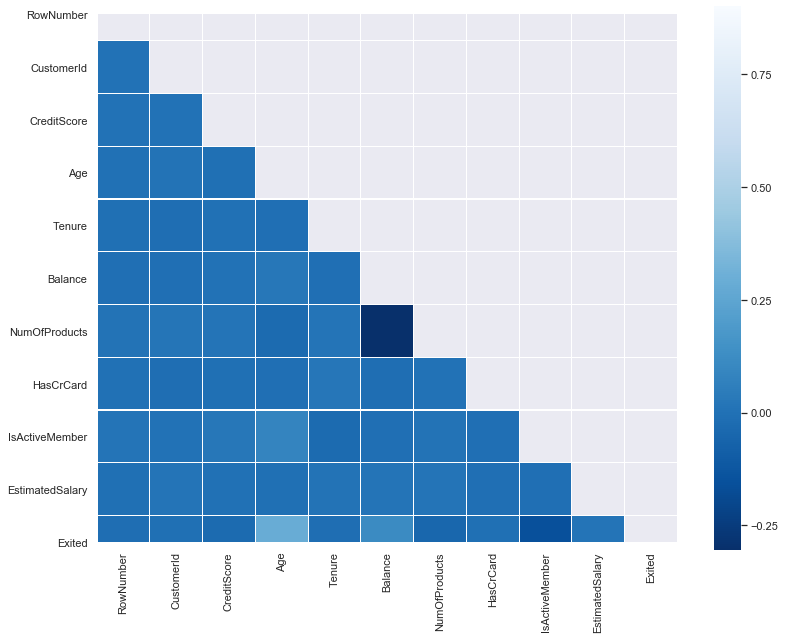

In [7]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1)
plt.figure(figsize=(13,10))
ax = sns.heatmap(df.corr(), linewidths=0.2, mask=mask, square=True, cmap="Blues_r",vmax = 0.9)
plt.show()

>LR 0.810 (0.004)
>Ridge 0.807 (0.004)
>KNN 0.828 (0.007)
>DecTree 0.791 (0.010)
>SVM 0.855 (0.004)
>Bayes 0.814 (0.006)
>LGBM 0.861 (0.005)
>XGBoost 0.863 (0.004)
>AdaBoost 0.856 (0.004)
>RF 0.861 (0.004)


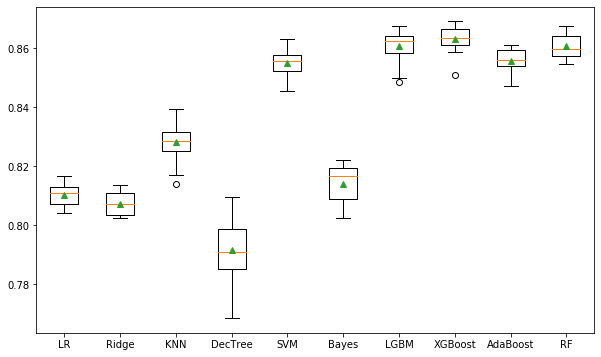

In [7]:
from matplotlib.pyplot import figure
from sklearn import preprocessing, linear_model
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

def X_y(path):
    df = pd.read_csv(path)
    df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
    df = pd.get_dummies(df)
    X = np.asarray(df.drop(['Exited'], axis=1))
    X = preprocessing.StandardScaler().fit(X).transform(X)
    y = np.asarray(df['Exited'])
    return X, y

def get_stacking():
    level0 = list()
    level0.append(('LR', LogisticRegression()))
    level0.append(('Ridge', RidgeClassifier()))
    level0.append(('KNN', KNeighborsClassifier()))
    level0.append(('DecTree', DecisionTreeClassifier()))
    level0.append(('SVM', SVC()))
    level0.append(('Bayes', GaussianNB()))
    level0.append(('LGBM', LGBMClassifier()))
    level0.append(('XGBost', XGBClassifier()))
    level0.append(('AdaBoost', AdaBoostClassifier()))
    level0.append(('RF', RandomForestClassifier()))
    
    level1 = RidgeClassifier()
    
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    models = dict()
    models['LR'] = LogisticRegression()
    models['Ridge'] = RidgeClassifier()
    models['KNN'] = KNeighborsClassifier()
    models['DecTree'] = DecisionTreeClassifier()
    models['SVM'] = SVC()
    models['Bayes'] = GaussianNB()
    models['LGBM'] = LGBMClassifier()
    models['XGBoost'] = XGBClassifier()
    models['AdaBoost'] = AdaBoostClassifier()
    models['RF'] = RandomForestClassifier()
    #models['Stacking'] = get_stacking()
    return models

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, verbose=0, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

path = 'churn_data.csv'
X, y = X_y(path)

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()   

Conclusion so far: XGBoost comes out as the most effective algorithm - given the accuracy metric.

Due to this certification's focus on Adanced Data Science and Deep Learning, I wanted to assess whether XGBoost would be outperformed by any neural network framework. To be honnest, since the dataframe "only" contains 10.000 observations, I did not expect a neural network based algorithm to outperform XGBoost. However, it was fun practice in the end.

In [16]:
df = pd.read_csv(path)
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df = pd.get_dummies(df)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [17]:
X = np.asarray(df.drop(['Exited'], axis=1))
X = preprocessing.StandardScaler().fit(X).transform(X)
y = np.asarray(df['Exited'])

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7000, 13) (7000,)
Test set: (3000, 13) (3000,)


In [19]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [22]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [23]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

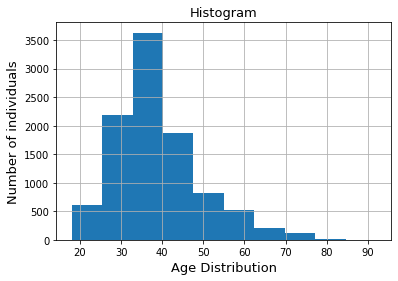

In [24]:
df['Age'].hist()
plt.xlabel('Age Distribution',fontsize=13)
plt.ylabel('Number of individuals',fontsize=13)
plt.title('Histogram',fontsize=13)
plt.show()

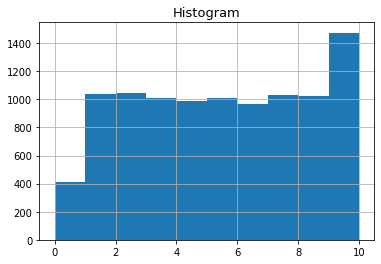

In [25]:
df['Tenure'].hist()
#plt.xlabel('Age Distribution',fontsize=13)
#plt.ylabel('Number of individuals',fontsize=13)
plt.title('Histogram',fontsize=13)
plt.show()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_57 (Dense)             (None, 11)                154       
_________________________________________________________________
dense_58 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_59 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 6         
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________
None
Train on 7000 samples, validate on 3000 samples
Epoch 1/500
7000/7000 [==============================] - 1s 74us/sam

Epoch 49/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3381 - accuracy: 0.8626 - val_loss: 0.3513 - val_accuracy: 0.8547
Epoch 50/500
7000/7000 [==============================] - 0s 22us/sample - loss: 0.3378 - accuracy: 0.8631 - val_loss: 0.3487 - val_accuracy: 0.8587
Epoch 51/500
7000/7000 [==============================] - 0s 22us/sample - loss: 0.3382 - accuracy: 0.8621 - val_loss: 0.3463 - val_accuracy: 0.8600
Epoch 52/500
7000/7000 [==============================] - 0s 22us/sample - loss: 0.3380 - accuracy: 0.8620 - val_loss: 0.3446 - val_accuracy: 0.8633
Epoch 53/500
7000/7000 [==============================] - 0s 22us/sample - loss: 0.3386 - accuracy: 0.8634 - val_loss: 0.3457 - val_accuracy: 0.8610
Epoch 54/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3373 - accuracy: 0.8624 - val_loss: 0.3484 - val_accuracy: 0.8587
Epoch 55/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3365 - accuracy: 0.8604

Epoch 104/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3338 - accuracy: 0.8619 - val_loss: 0.3466 - val_accuracy: 0.8610
Epoch 105/500
7000/7000 [==============================] - 0s 20us/sample - loss: 0.3329 - accuracy: 0.8636 - val_loss: 0.3513 - val_accuracy: 0.8563
Epoch 106/500
7000/7000 [==============================] - 0s 22us/sample - loss: 0.3333 - accuracy: 0.8610 - val_loss: 0.3466 - val_accuracy: 0.8597
Epoch 107/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3329 - accuracy: 0.8630 - val_loss: 0.3512 - val_accuracy: 0.8577
Epoch 108/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3321 - accuracy: 0.8643 - val_loss: 0.3486 - val_accuracy: 0.8607
Epoch 109/500
7000/7000 [==============================] - 0s 22us/sample - loss: 0.3323 - accuracy: 0.8623 - val_loss: 0.3462 - val_accuracy: 0.8563
Epoch 110/500
7000/7000 [==============================] - 0s 22us/sample - loss: 0.3324 - accuracy:

Epoch 213/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3264 - accuracy: 0.8667 - val_loss: 0.3456 - val_accuracy: 0.8553
Epoch 214/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3273 - accuracy: 0.8631 - val_loss: 0.3463 - val_accuracy: 0.8547
Epoch 215/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3266 - accuracy: 0.8659 - val_loss: 0.3457 - val_accuracy: 0.8570
Epoch 216/500
7000/7000 [==============================] - 0s 20us/sample - loss: 0.3262 - accuracy: 0.8630 - val_loss: 0.3474 - val_accuracy: 0.8580
Epoch 217/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3264 - accuracy: 0.8633 - val_loss: 0.3476 - val_accuracy: 0.8573
Epoch 218/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3263 - accuracy: 0.8653 - val_loss: 0.3475 - val_accuracy: 0.8530
Epoch 219/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3263 - accuracy:

7000/7000 [==============================] - 0s 21us/sample - loss: 0.3246 - accuracy: 0.8649 - val_loss: 0.3424 - val_accuracy: 0.8567
Epoch 322/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3248 - accuracy: 0.8647 - val_loss: 0.3422 - val_accuracy: 0.8580
Epoch 323/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3245 - accuracy: 0.8649 - val_loss: 0.3441 - val_accuracy: 0.8567
Epoch 324/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3251 - accuracy: 0.8637 - val_loss: 0.3439 - val_accuracy: 0.8570
Epoch 325/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3239 - accuracy: 0.8651 - val_loss: 0.3482 - val_accuracy: 0.8527
Epoch 326/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3250 - accuracy: 0.8673 - val_loss: 0.3468 - val_accuracy: 0.8543
Epoch 327/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3253 - accuracy: 0.8661 - val_

Epoch 430/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3231 - accuracy: 0.8686 - val_loss: 0.3447 - val_accuracy: 0.8527
Epoch 431/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3245 - accuracy: 0.8657 - val_loss: 0.3449 - val_accuracy: 0.8577
Epoch 432/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3231 - accuracy: 0.8671 - val_loss: 0.3455 - val_accuracy: 0.8533
Epoch 433/500
7000/7000 [==============================] - 0s 22us/sample - loss: 0.3252 - accuracy: 0.8647 - val_loss: 0.3429 - val_accuracy: 0.8547
Epoch 434/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3233 - accuracy: 0.8637 - val_loss: 0.3440 - val_accuracy: 0.8557
Epoch 435/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3239 - accuracy: 0.8649 - val_loss: 0.3455 - val_accuracy: 0.8587
Epoch 436/500
7000/7000 [==============================] - 0s 21us/sample - loss: 0.3236 - accuracy:

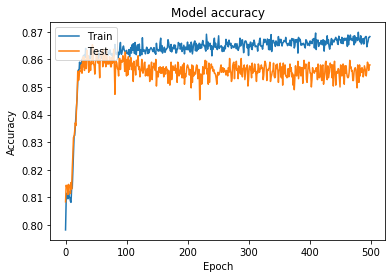

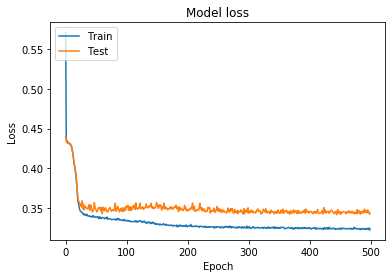

In [38]:
import tensorflow as tf
from tensorflow.keras import Model, optimizers, regularizers
from tensorflow.keras.layers import Dense, Activation, Dropout
from numpy.random import seed
from tensorflow.keras.models import Sequential

def create_model(lyrs=[5]):
    
    seed(42)
    tf.random.set_seed(42)
    neurons=X_test.shape[1]
    opt='Adam'
    act='tanh'
    
    model = Sequential()
    model.add(Dense(neurons, input_dim=neurons, kernel_initializer = 'uniform', activation=act))
    model.add(Dense(neurons-2, input_dim=neurons, kernel_initializer = 'uniform', activation=act))
    model.add(Dense(neurons-4, input_dim=neurons, kernel_initializer = 'uniform', activation=act))
    model.add(Dense(neurons-8, input_dim=neurons, kernel_initializer = 'uniform', activation=act))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

model = create_model()
print(model.summary())

NN_seq = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test), verbose=1)

test_acc = np.mean(NN_seq.history['val_accuracy'])
train_acc = np.mean(NN_seq.history['accuracy'])

print("\n%s: %.2f%%" % ('average test acc', test_acc*100))
print("%s: %.2f%%" % ('average train acc', train_acc*100))

plt.plot(NN_seq.history['accuracy'])
plt.plot(NN_seq.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(NN_seq.history['loss'])
plt.plot(NN_seq.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Final conclusion: The neural network based framework does not outperform the XGBoost algorithm when measuring its accuracy on the test/validation data.

From this point, it would be natural to proceed with the XGBoost algorithm especially since it is much less computationally expensive.

Moreover, an accuracy > 80 for this scenario should be considered quite effective.